In [52]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

%matplotlib inline

In [70]:
alpha = 10000
beta = 10000
gamma = 10000
L = alpha + beta + gamma #total population

mu = 40.0 #parameters for the valuation distribution
sigma = 100.0

deltas = np.random.normal(loc=mu, scale=sigma, size=[alpha]) #sample fundamental valuations
S = 100.0


n_years = 0.1
freq = 500
dates = np.linspace(start=0,stop=n_years,num=freq) 

prices = [S]
pop_buyers = 0
pop_sellers = 0

for t in dates[1:]:
    lambdas_up =  deltas[deltas - S>0] - S #optimistic investors (sample valuation above S)
    lambdas_down = - deltas[deltas - S<=0] + S #pessimistic investors (sample valuation below S)
    
    pop_buyers = sum([np.random.exponential(scale = 1/l)<=t for l in lambdas_up])
    pop_sellers = sum([np.random.exponential(scale = 1/l)<=t for l in lambdas_down])
    

    quantile = pop_buyers / (pop_buyers + pop_sellers)
 
    S = stats.norm.ppf(quantile,loc = S,scale = sigma) #update S to reflect the balance between supply and demand
    
    prices.append(S)
    
prices = pd.DataFrame(data = prices, index = dates)
prices.columns = ['price']
prices['Rolling Var 5f'] = prices['price'].rolling(window = 5).std()
prices['Lower 95% bound'] = prices['price'] - 1.96 * prices['Rolling Var 5f']
prices['Upper 95% bound'] = prices['price'] + 1.96 * prices['Rolling Var 5f']

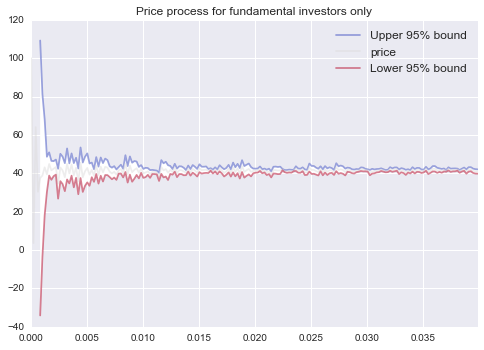

In [77]:
plt.style.use('seaborn')
ax = prices[['Upper 95% bound','price','Lower 95% bound']].head(200).plot(colormap='coolwarm',alpha = 0.5)
ax.set_title('Price process for fundamental investors only',fontsize = 12)

ax.fill_between(prices.index,prices['Upper 95% bound'], prices['Lower 95% bound'],color = 'white')
ax.legend(prop={'size': 12});

$$\pi{}_\alpha{}_+^\infty = \alpha{} (1 - \phi{}_\mu{},_\sigma{}(S))$$

Here, $\pi{}_\alpha{}_+^\infty$, representing the asymptotical population of buyers is the following: 

In [15]:
pop_buyers

4836

And $\pi{}_\alpha{}_-^\infty$, same but for short sellers, is: 

In [16]:
pop_sellers

4834